In [10]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import AdamW, Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [11]:
from tensorflow.keras.models import load_model

In [12]:
from keras.layers import LeakyReLU

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Simulating a dataset
data = pd.read_csv("battle_pca_data.csv")


In [15]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [16]:
# Preprocessing data
X = data.drop(columns=["Offset"]).values
y = data["Offset"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [17]:
model = load_model("best_model.keras")

In [18]:
model.evaluate(X_test, y_test, verbose=1)

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3945 - mean_squared_error: 0.8360 - r2_score: -3.1267


[0.3900938332080841, 0.8275023698806763, -3.064260482788086]

In [19]:
model.predict(X_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


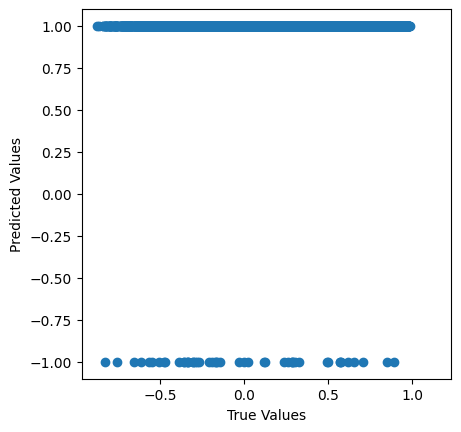

In [20]:
predictions = model.predict(X_test).flatten()

# Visualize predictions
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.axis('equal')
plt.axis('square')

plt.show()


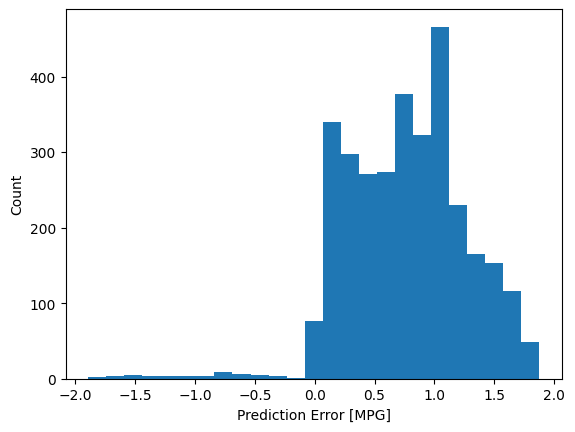

In [21]:
error = predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [22]:
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_79 (Dense)                │ (None, 90)             │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 90)             │         8,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,005 (105.49 KB)

 Trainable params: 9,001 (35.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,004 (70.33 KB)

In [23]:
# Get the weights and biases from the model
weights = model.get_weights()

# Extract weights and biases for each layer
W1, b1 = weights[0], weights[1]  # First hidden layer weights and biases
W2, b2 = weights[2], weights[3]  # Second hidden layer weights and biases
W3, b3 = weights[4], weights[5]  # Output layer weights and biases

# Define activation functions
def relu(x):
    alpha = 0.02
    return np.maximum(alpha*x, x)
    
def linear(x):
    return x

# Manually perform the forward pass
def manual_predict(X_input):
    # First hidden layer
    Z1 = np.dot(X_input, W1) + b1
    A1 = relu(Z1)
    
    # Second hidden layer
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)

    # Output layer
    Z3 = np.dot(A2, W3) + b3
    output = linear(Z3)
    
    return output

# Example prediction for a single input instance
X_input = X_train[1:2]  # Use a single example from your training data
manual_prediction = manual_predict(X_input)

print("Manual prediction:", manual_prediction)

# Compare with the model's prediction
model_prediction = model.predict(X_input)
print("Model prediction:", model_prediction)


Manual prediction: [[10177108.94781766]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Model prediction: [[1.]]


In [24]:
X_input

array([[-0.91321997, -1.37989165,  0.76860041, -1.40877236, -0.54411347,
        -2.72170619, -3.5846643 ]])